<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Reza Soumi
### Student Number : 98105857
### Colab Link: https://colab.research.google.com/drive/17XfwgCsQLWhbQWR6QFCblSY2zkjz8eY8?usp=sharing
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Data Exploration (20 points)

In [ ]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-15 21:47:36--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-15 21:47:36--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7131d9af22b739d96229f073ae.dl.dropboxusercontent.com/cd/0/get/B8Fazc_7KmzN8YQ6fNszwdSZ_GJ71IlVfm6TXrY3-VaW3IrVTPlb3BqjU7KHSn9xIC7_tnjbSEK6gB-ehBnYnEXOttpA0ls2tpEwMa5V3XAy3nTvHPDWOAxsmsCV55WR6ITtOEZLeOlnQIz3nz5g3JerDd6ycCPRMyqFlr2XD-M3Jd9WzeoFFKtTT3vO2bZ06y8/file?dl=1# [following]
--2023-05-15 21:47:37--  https://uc7131d9af22b739d96229f073ae.dl.dropboxusercontent.com/cd/0/get/B8Fazc_7KmzN8YQ6fNszwdSZ_GJ71IlVfm6TXrY3-VaW3IrVTPlb3BqjU7KHSn9xIC

Load the dataset as a dataframe

In [260]:
df = pd.read_csv('dataset.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


In [261]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Plot "year" against "average life expectancy"

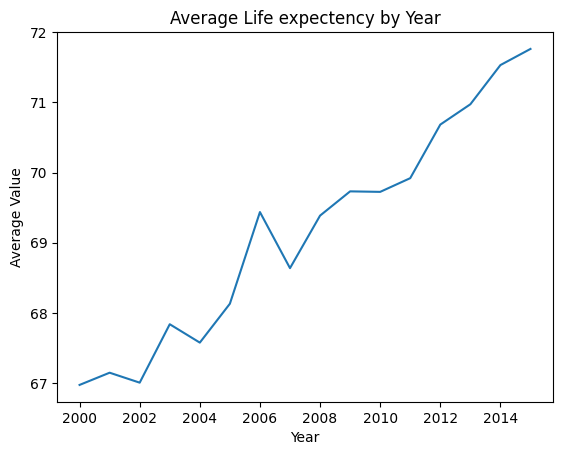

In [262]:
grouped_df = df.groupby('Year')['Life expectancy '].mean()

grouped_df.plot()

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Life expectency by Year')

plt.show()

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

In [263]:
grouped_df = df.groupby(['Year', 'Status']).agg({'Life expectancy ': 'mean'}).reset_index()

pivoted_df = grouped_df.pivot(index='Year', columns='Status', values='Life expectancy ')

print(pivoted_df)

Status  Developed  Developing
Year                         
2000    76.891667   65.004959
2001    77.114286   65.048120
2002    77.710000   64.393496
2003    78.257692   65.617213
2004    78.452000   65.500000
2005    78.792593   65.898450
2006    79.346667   67.167939
2007    79.252381   66.935878
2008    78.796552   67.365185
2009    79.581481   67.777206
2010    80.167857   67.404762
2011    79.821739   68.182443
2012    80.512000   68.823485
2013    80.376923   69.049606
2014    81.292593   69.442063
2015    80.175000   69.937984


Get the correlation between "Life expectancy" and "GDP"

In [264]:
corr = df['Life expectancy '].corr(df['GDP'])

print("Correlation between Life expectancy and GDP:", corr)

Correlation between Life expectancy and GDP: 0.4652553879500644


Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [265]:
corr = df.corr()['Life expectancy ']

strongest_corr = corr.drop('Life expectancy ').abs().idxmax()

print("Feature with the strongest correlation with Life expectancy:", strongest_corr)

Feature with the strongest correlation with Life expectancy: Schooling


<ipython-input-265-61f7882f1357>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Life expectancy ']


# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

To get better result can fill null values with mean of each feature.

In [266]:
mean_values = df.mean()
df = df.fillna(mean_values)

<ipython-input-266-b0e22ef650c9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


In [268]:
df = df.dropna()
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2.497000e+03,2497.000000,2497.000000,2497.000000,2497.000000
mean,2007.552263,69.165702,165.007640,31.681217,4.549065,716.385098,80.971949,2509.197437,38.205511,43.892271,82.514102,5.927231,82.362208,1.695875,7430.312807,1.323247e+07,4.886305,4.907172,0.626072,11.971120
std,4.587357,9.460323,124.222313,124.136779,3.899483,1930.992913,22.629465,11973.006070,19.823731,168.927855,23.429843,2.387899,23.586901,4.869347,13059.915406,5.764430e+07,4.456423,4.533455,0.204553,3.222824
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.080000,4.783806,80.971949,0.000000,19.400000,0.000000,78.000000,4.360000,78.000000,0.100000,586.836400,3.959690e+05,1.600000,1.600000,0.505000,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.090000,64.856167,87.000000,16.000000,42.600000,4.000000,93.000000,5.927231,93.000000,0.100000,2954.119467,3.584861e+06,3.400000,3.400000,0.660000,12.100000
75%,2012.000000,75.500000,227.000000,23.000000,7.310000,426.785566,96.000000,373.000000,56.000000,29.000000,97.000000,7.300000,97.000000,0.800000,7430.312807,1.323247e+07,7.200000,7.200000,0.769000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.300000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.600000


Convert categorical columns into their one-hot encoded versions

In [269]:
df = pd.get_dummies(df, columns=['Country', 'Status'])

Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [270]:
y = np.array(df['Life expectancy '])
x = df.drop('Life expectancy ', axis=1)

x = x.values

Normalize the data

In [271]:
x = x / np.linalg.norm(x)

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [273]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , ))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X).flatten()
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 100 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [274]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        return self.lamda * np.sum(np.abs(weights))
        
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return (self.lamda * np.sign(weights)).flatten()

class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        return self.lamda * np.sum(weights**2)
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return (self.lamda * 2 * weights).flatten()

# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [275]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [276]:
my_lasso = LassoRegression(lamda=0.001, learning_rate=0.001, iteration=5000)
my_lasso.train(x, y)

The loss function for the iteration 100----->2006.892244475442 :)
The loss function for the iteration 200----->1651.2701212327834 :)
The loss function for the iteration 300----->1360.258200051267 :)
The loss function for the iteration 400----->1122.117958615223 :)
The loss function for the iteration 500----->927.2435549251163 :)
The loss function for the iteration 600----->767.7743572899474 :)
The loss function for the iteration 700----->637.2778707150483 :)
The loss function for the iteration 800----->530.4902699147575 :)
The loss function for the iteration 900----->443.1040728527899 :)
The loss function for the iteration 1000----->371.59439021653026 :)
The loss function for the iteration 1100----->313.0767422654879 :)
The loss function for the iteration 1200----->265.1907078245873 :)
The loss function for the iteration 1300----->226.00471218191845 :)
The loss function for the iteration 1400----->193.9381133287203 :)
The loss function for the iteration 1500----->167.69744374108714 :)


# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [277]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best regularization coefficient:", grid_search.best_params_['alpha'])
print("Best score:", grid_search.best_score_)

lasso = Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(x_train, y_train)

Best regularization coefficient: 0.001
Best score: -0.006531803591290952


Lasso(alpha=0.001)

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [278]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [279]:
my_ridge = RidgeRegression(lamda=0.001, learning_rate=0.001, iteration=5000)
my_ridge.train(x, y)

The loss function for the iteration 100----->2006.892244475442 :)
The loss function for the iteration 200----->1651.2701212327834 :)
The loss function for the iteration 300----->1360.258200051267 :)
The loss function for the iteration 400----->1122.117958615223 :)
The loss function for the iteration 500----->927.2435549251163 :)
The loss function for the iteration 600----->767.7743572899474 :)
The loss function for the iteration 700----->637.2778707150483 :)
The loss function for the iteration 800----->530.4902699147575 :)
The loss function for the iteration 900----->443.1040728527899 :)
The loss function for the iteration 1000----->371.59439021653026 :)
The loss function for the iteration 1100----->313.0767422654879 :)
The loss function for the iteration 1200----->265.1907078245873 :)
The loss function for the iteration 1300----->226.00471218191845 :)
The loss function for the iteration 1400----->193.9381133287203 :)
The loss function for the iteration 1500----->167.69744374108714 :)


# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [280]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x, y)

print(f"Best regularization parameter: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

ridge = Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(x_train, y_train)

Best regularization parameter: {'alpha': 0.1}
Best score: -0.0038369941357208727


Ridge(alpha=0.1)

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [281]:
lasso_preds = lasso.predict(x_test)
my_lasso_preds = my_lasso.predict(x_test)
ridge_preds = ridge.predict(x_test)
my_ridge_preds = my_ridge.predict(x_test)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [283]:
sklearn_lasso_mse = mean_squared_error(y_test, lasso_preds)
print("Sklearn Lasso Regression MSE:", sklearn_lasso_mse)
my_lasso_mse = mean_squared_error(y_test, my_lasso_preds)
print("My Lasso Regression MSE:", my_lasso_mse)
sklearn_ridge_mse = mean_squared_error(y_test, ridge_preds)
print("Sklearn Ridge Regression MSE:", sklearn_ridge_mse)
my_ridge_mse = mean_squared_error(y_test, my_ridge_preds)
print("My Ridge Regression MSE:", my_ridge_mse)

print("************************************")

sklearn_lasso_r2 = r2_score(y_test, lasso_preds)
print("Sklearn Lasso Regression R^2:", sklearn_lasso_r2)
my_lasso_r2 = r2_score(y_test, my_lasso_preds)
print("My Lasso Regression R^2:", my_lasso_r2)
sklearn_ridge_r2 = r2_score(y_test, ridge_preds)
print("Sklearn Ridge Regression R^2:", sklearn_ridge_r2)
my_ridge_r2 = r2_score(y_test, my_ridge_preds)
print("My Ridge Regression R^2:", my_ridge_r2)

Sklearn Lasso Regression MSE: 90.29244015031081
My Lasso Regression MSE: 90.15117080975368
Sklearn Ridge Regression MSE: 90.29850413346081
My Ridge Regression MSE: 90.15117080975368
************************************
Sklearn Lasso Regression R^2: -0.0022631790511282723
My Lasso Regression R^2: -0.0006950626270560978
Sklearn Ridge Regression R^2: -0.0023304904120740044
My Ridge Regression R^2: -0.0006950626270560978


# Kaggle

Done!

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c